In [131]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from datetime import datetime, timedelta

In [2]:
datapath = '../data/'

In [3]:
import glob
files = glob.glob(datapath+'*.csv')
files[0]

'../data/FC3DC207-9459-4CBE-8AB5-0E0AC77D5FEC.csv'

In [4]:
dfs = [pd.read_csv(f) for f in files]
dfs[1] = dfs[1].rename(columns={" timestamp ": "timestamp"})

In [5]:
for df in dfs:
    df['mag'] = np.sqrt(df['x']**2+df['y']**2+df['z']**2)
    df['time'] = pd.to_datetime(df['timestamp'], unit='ms')
dfs[0].head(5)

timestamp           type        lat        lon      height  accuracy  \
0  1.431035e+12            gps  41.978753 -87.893018  194.760063      10.0   
1  1.431035e+12  accelerometer        NaN        NaN         NaN       NaN   
2  1.431035e+12  accelerometer        NaN        NaN         NaN       NaN   
3  1.431035e+12  accelerometer        NaN        NaN         NaN       NaN   
4  1.431035e+12  accelerometer        NaN        NaN         NaN       NaN   

   speed     bearing         x         y         z       mag  \
0  14.36  139.570312       NaN       NaN       NaN       NaN   
1    NaN         NaN -0.075974 -0.448395 -0.867188  0.979206   
2    NaN         NaN -0.079025 -0.435837 -0.919876  1.020966   
3    NaN         NaN -0.069183 -0.456039 -0.921722  1.030694   
4    NaN         NaN -0.059341 -0.456772 -0.896149  1.007593   

                        time  
0 2015-05-07 21:46:58.761430  
1 2015-05-07 21:46:58.834430  
2 2015-05-07 21:46:58.932430  
3 2015-05-07 21:46:59.030430  
4 2015-05-07 21:46:59.129430

In [201]:
def Find_events(dfs, variable, window):
    events_df = pd.DataFrame()
    drivers = []
    for i in range(6,24):
        test = dfs[i].sort_values(by='time')
        test = test.set_index(['time'])

        test2 = test.rolling(window).mean()
        test2_std = test.rolling(window).std()

        orig_df = dfs[i][['time',variable]]
        orig_df = orig_df.set_index(['time'])
        orig_df_plot = orig_df.dropna(axis=0,how='any')


        for j in range(0,len(test.index)):
            if test[variable][j] > (test2[variable][j]+(2.9*test2_std[variable][j])):
                print(i,test2.index[j])
                events_df = events_df.append(test.iloc[j])
                drivers.append(i)
    events_df['driver']=drivers
    return events_df
                



In [202]:
event = Find_events(dfs,'mag','1s')

6 2015-03-19 20:50:03.761870
6 2015-03-19 20:53:07.782870
6 2015-03-19 20:53:11.084870
6 2015-03-19 20:53:13.320870
6 2015-03-19 21:07:17.232870
6 2015-03-19 21:28:06.615870
6 2015-03-19 21:28:20.683870
6 2015-03-19 21:29:20.649870
6 2015-03-19 21:29:47.039870
6 2015-03-19 21:32:49.043870
6 2015-03-19 21:34:11.403870
6 2015-03-19 21:34:31.668870
6 2015-03-19 21:35:34.149870
6 2015-03-19 21:36:13.839870
6 2015-03-19 21:36:22.383870
6 2015-03-19 21:36:45.571870
6 2015-03-19 21:36:55.557870
6 2015-03-19 21:37:29.228870
6 2015-03-19 21:37:43.687870
6 2015-03-19 21:39:51.137870
6 2015-03-19 21:41:09.783870
7 2015-04-13 21:15:43.407980
7 2015-04-13 21:15:45.453980
7 2015-04-13 21:16:09.229980
7 2015-04-13 21:18:10.628980
7 2015-04-13 21:21:08.665980
7 2015-04-13 21:21:31.568980
7 2015-04-13 21:21:56.809980
8 2015-06-23 20:38:20.664510
8 2015-06-23 20:59:28.298510
8 2015-06-23 20:59:41.216510
8 2015-06-23 21:01:09.499510
8 2015-06-23 21:01:32.168510
10 2015-06-20 20:22:45.493120
10 2015-06-20

0 6


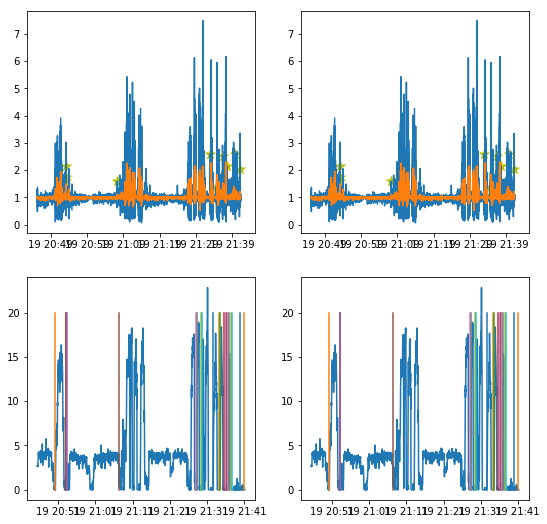

1 6


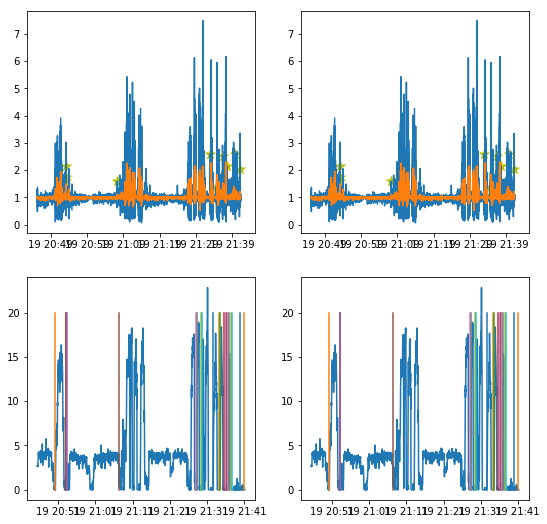

2 6


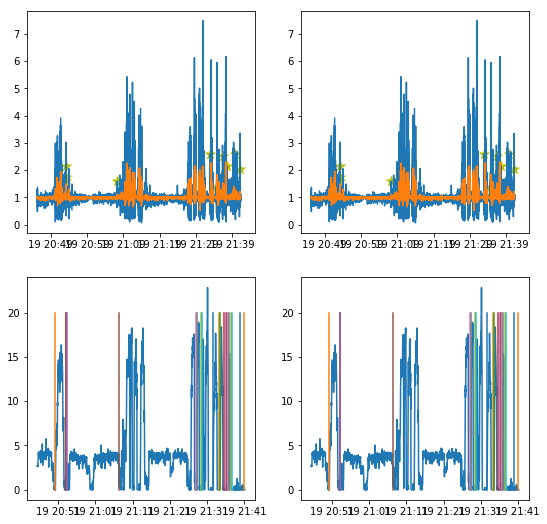

3 6


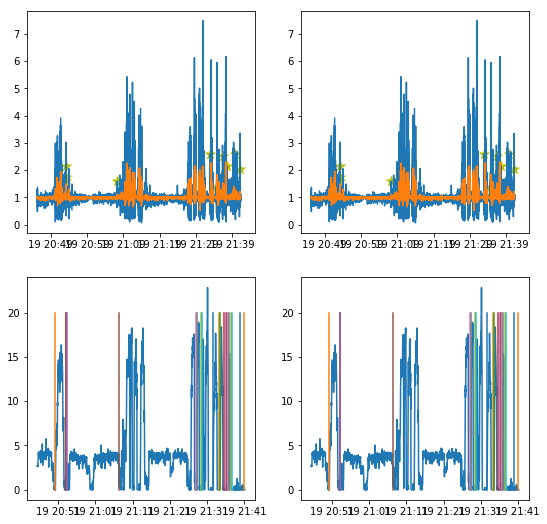

4 6


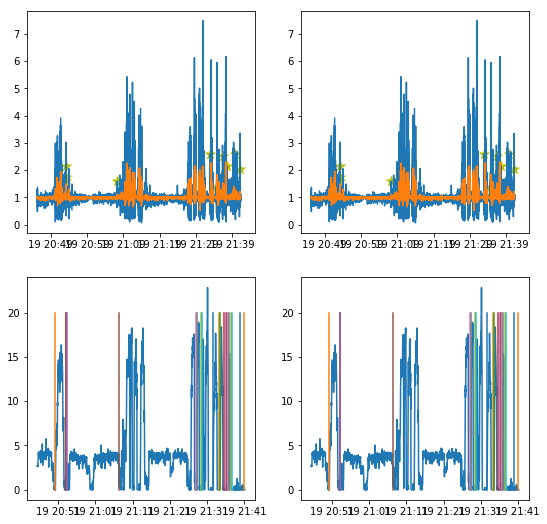

5 6


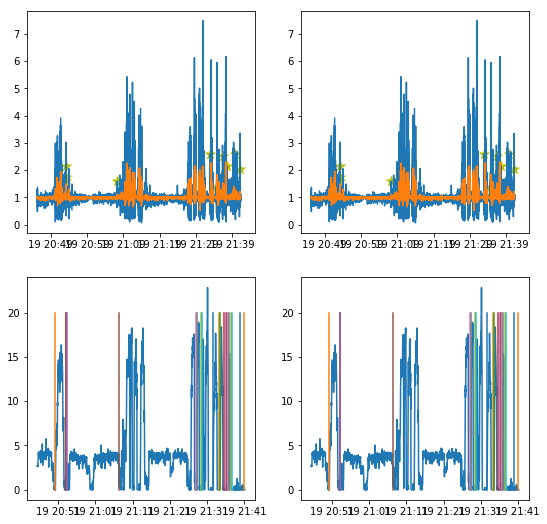

6 6


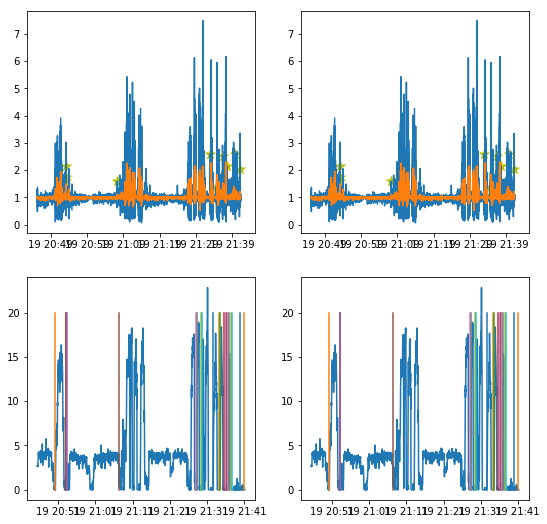

7 6


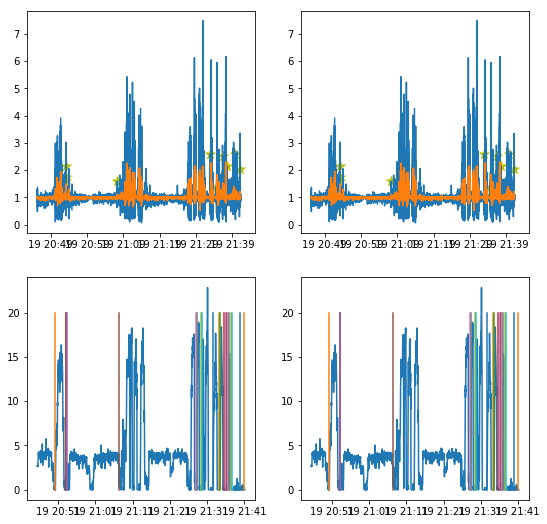

8 6


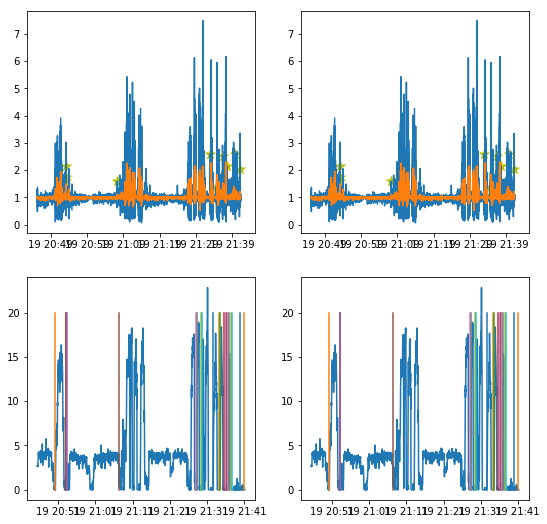

9 6


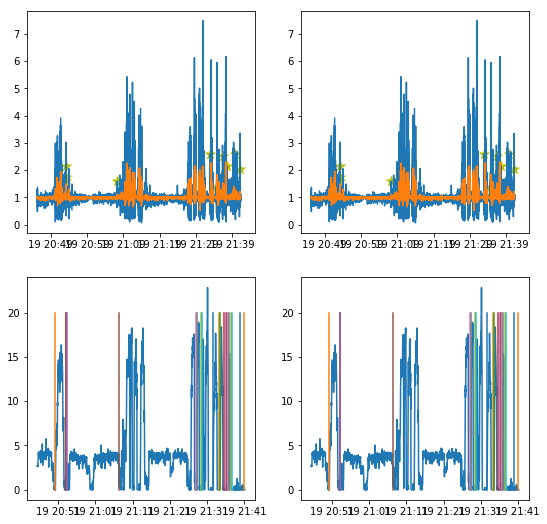

10 6


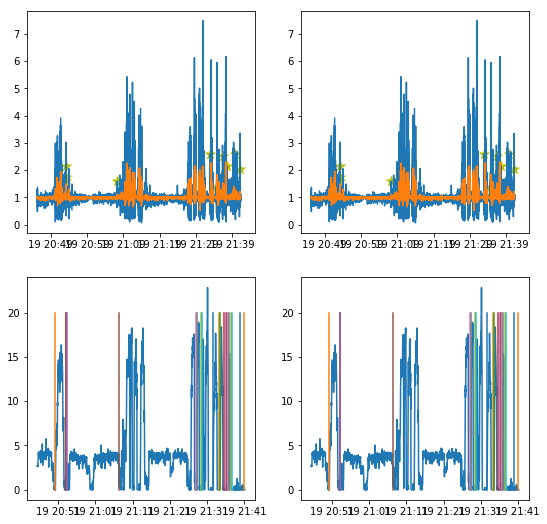

11 6


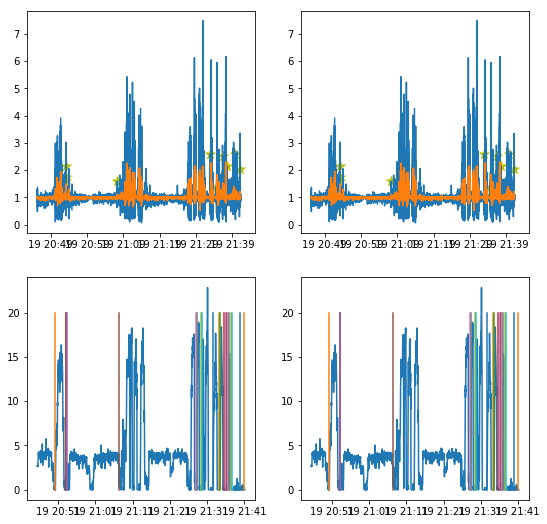

12 6


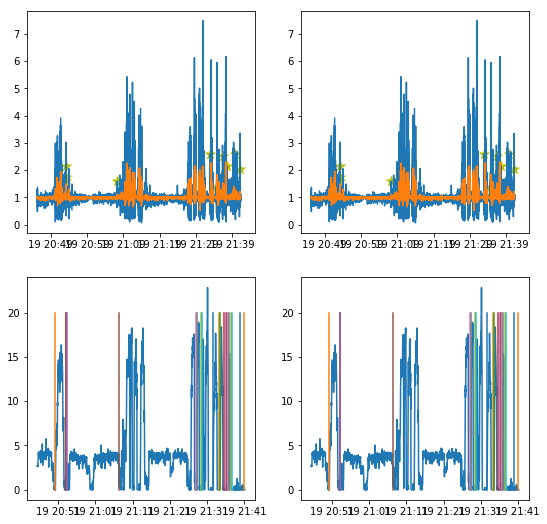

13 6


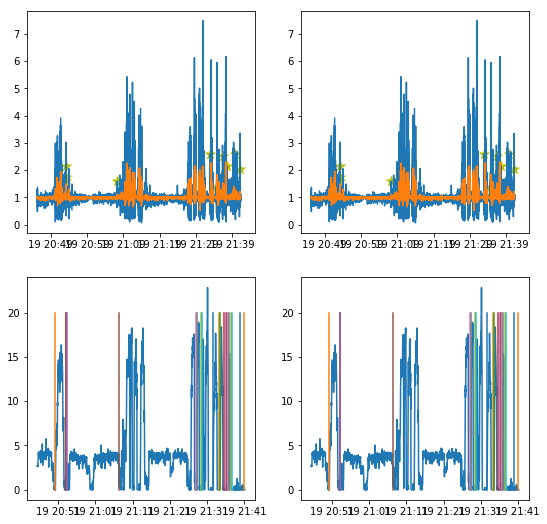

14 6


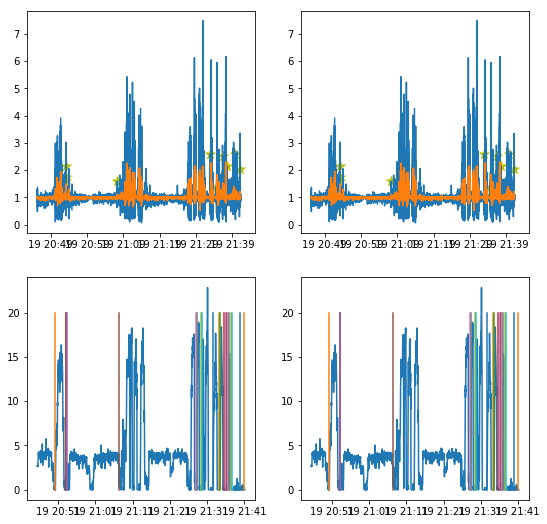

15 6


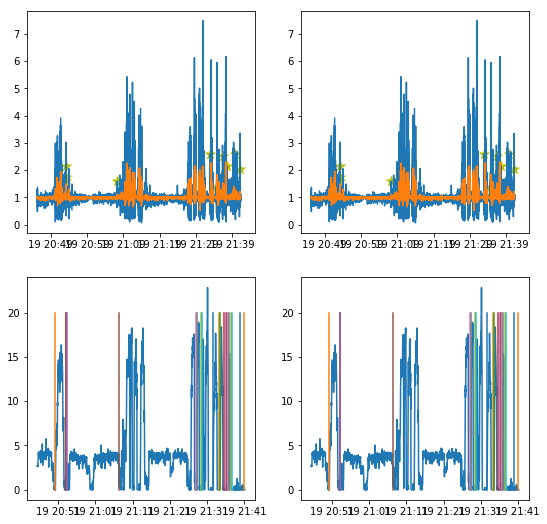

16 6


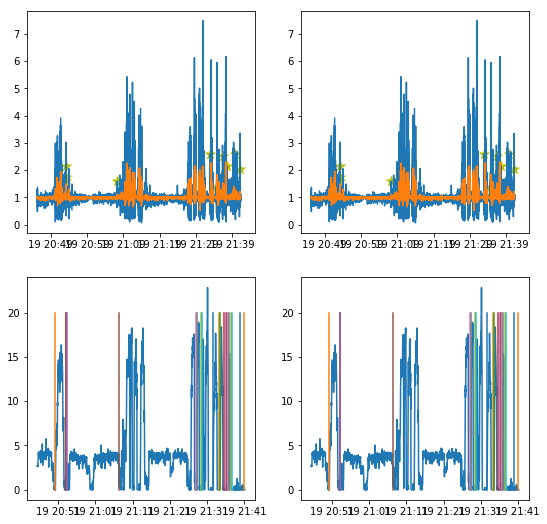

17 6


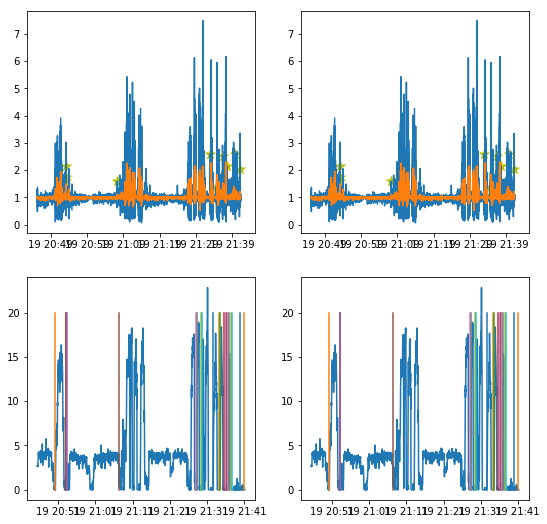

18 6


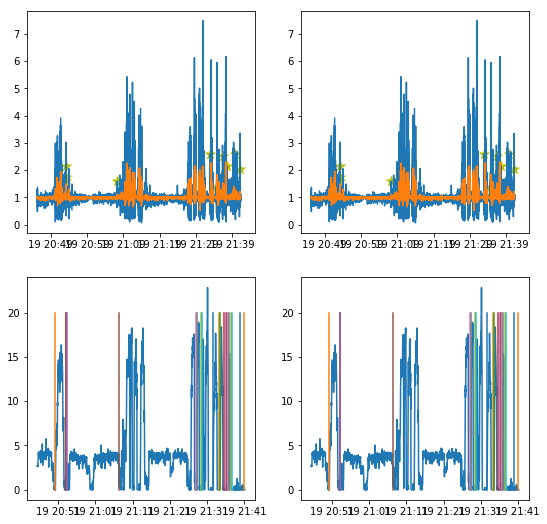

19 6


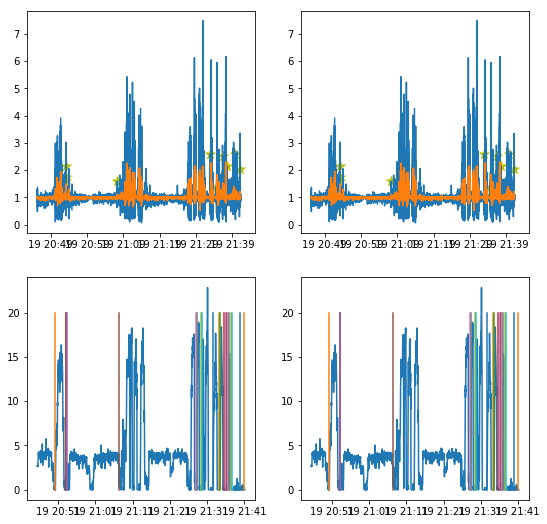

20 6


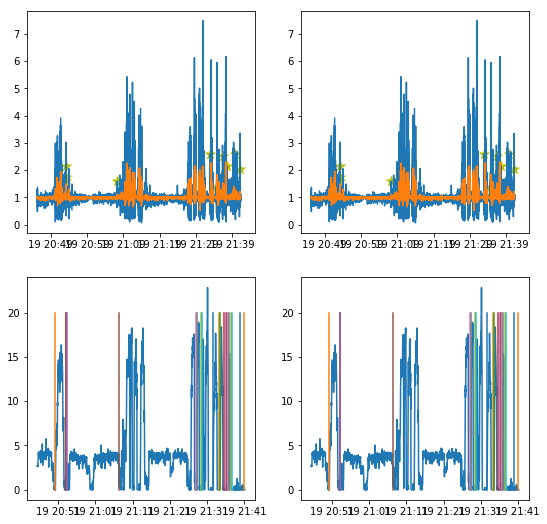

21 7


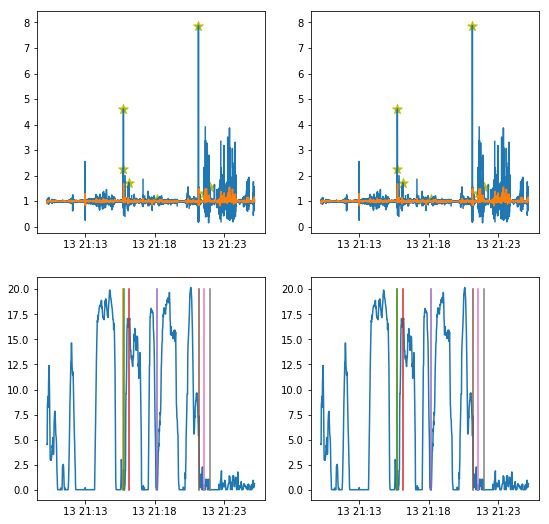

22 7


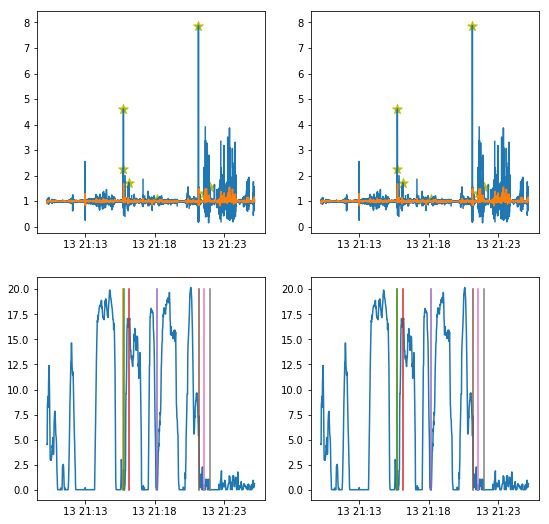

23 7


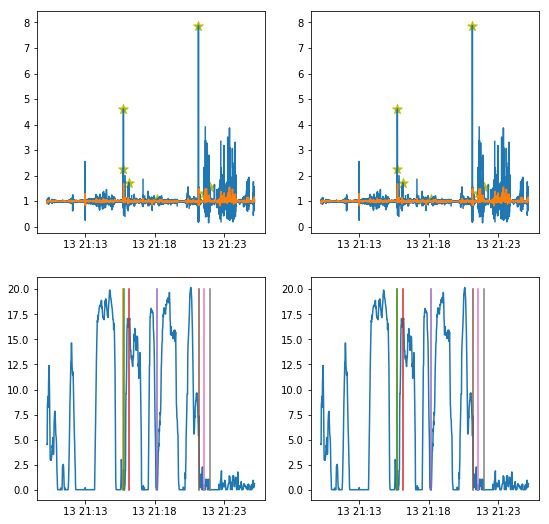

24 7


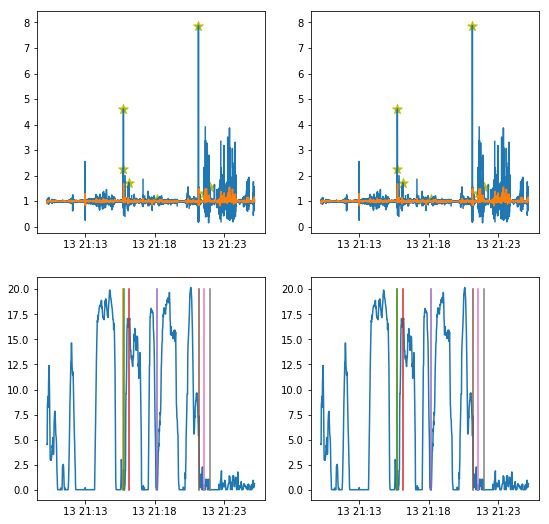

25 7


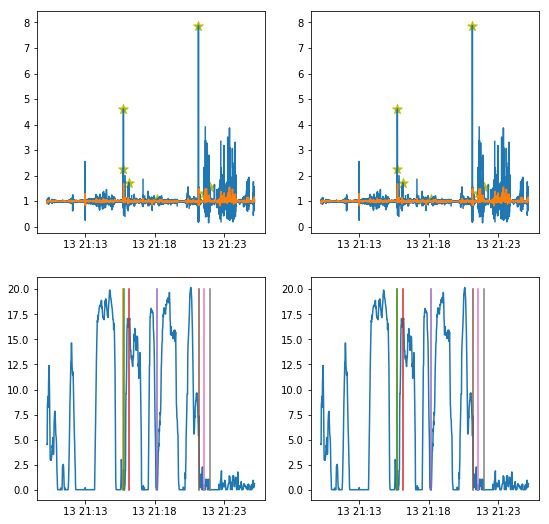

26 7


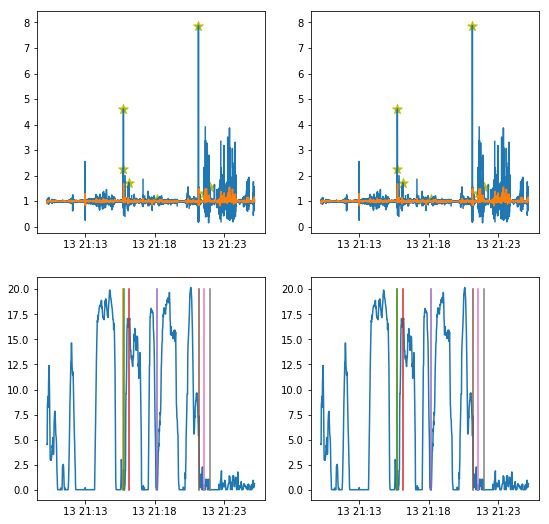

27 7


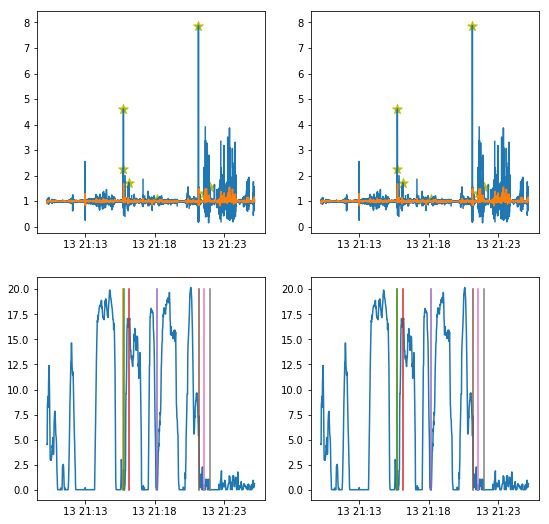

28 8


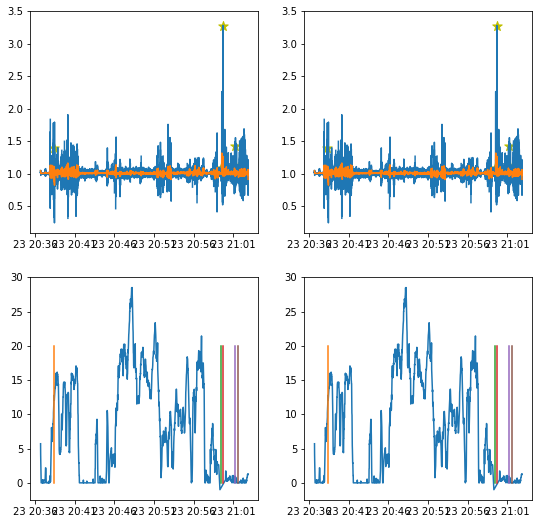

29 8


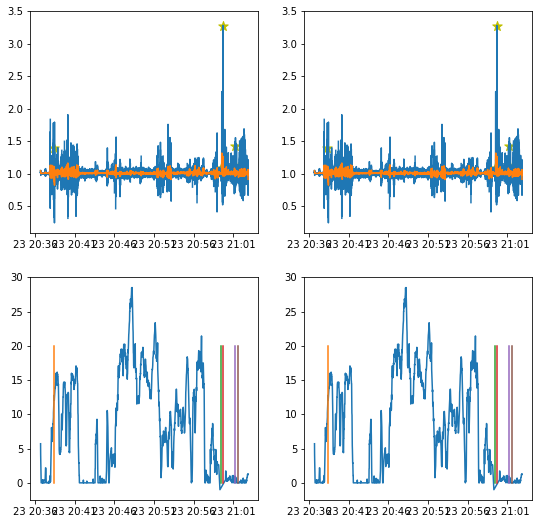

30 8


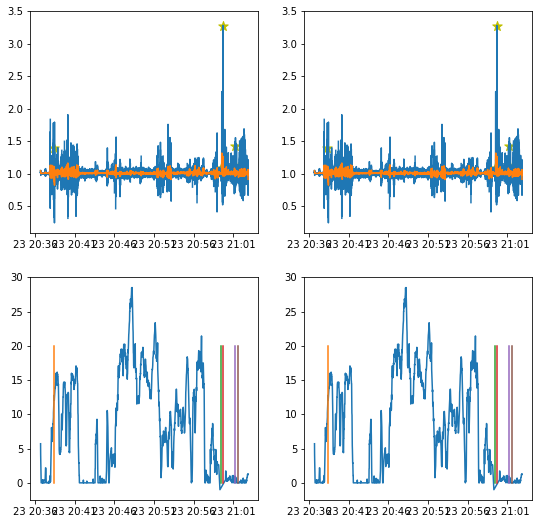

31 8


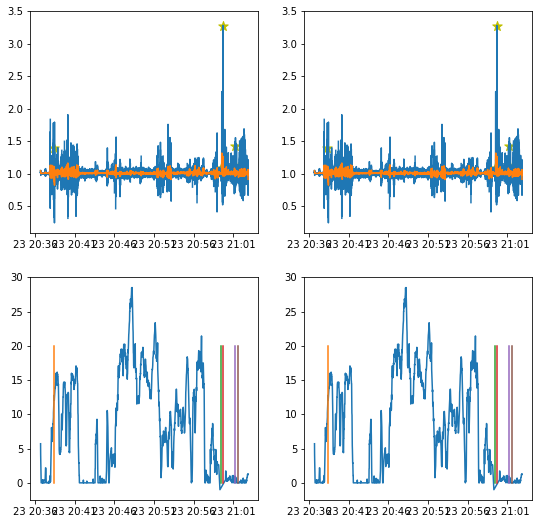

32 8


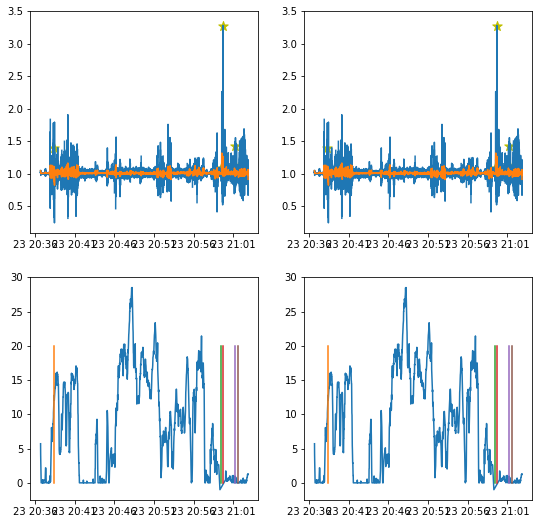

33 10


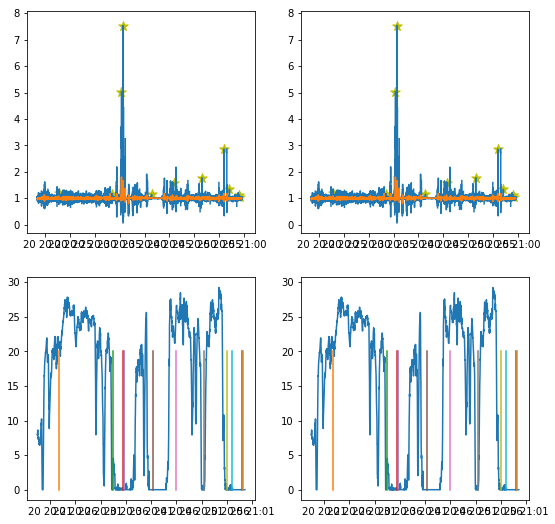

34 10


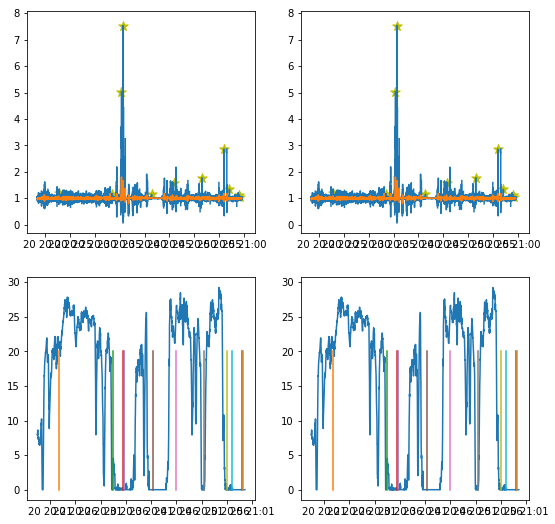

35 10


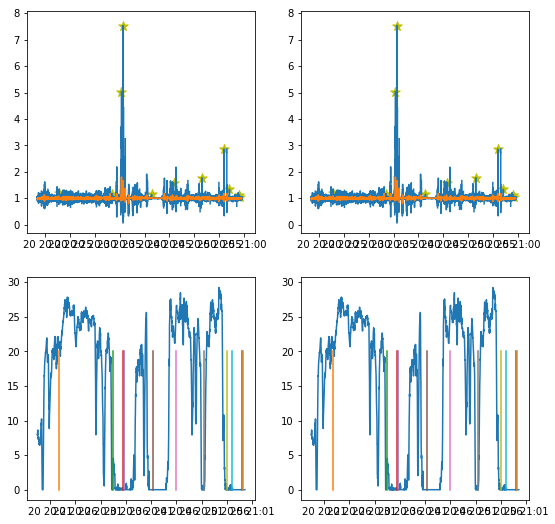

36 10


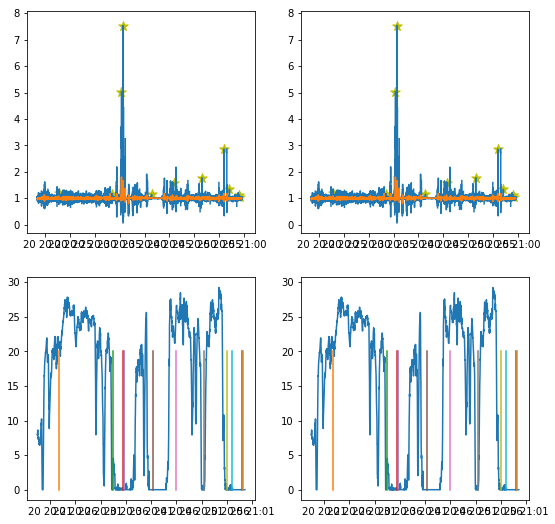

37 10


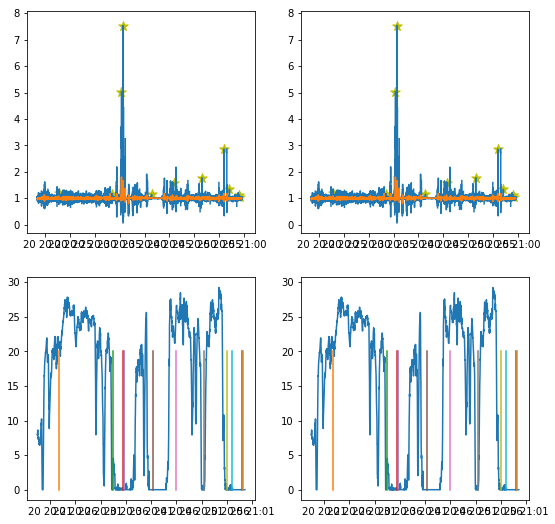

38 10


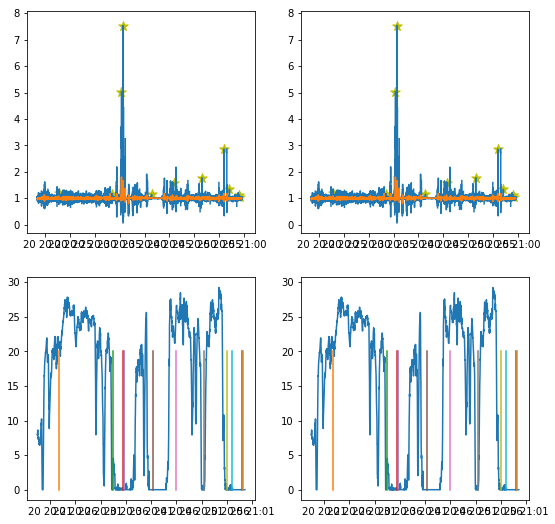

39 10


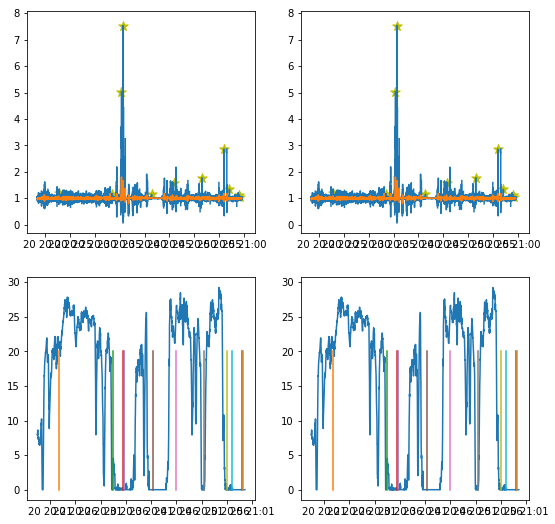

40 10


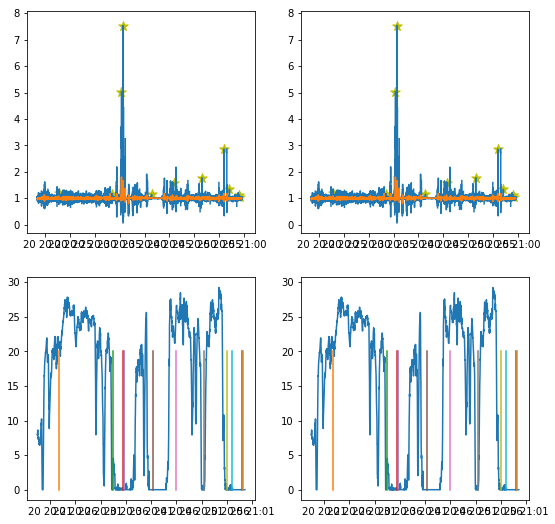

41 10


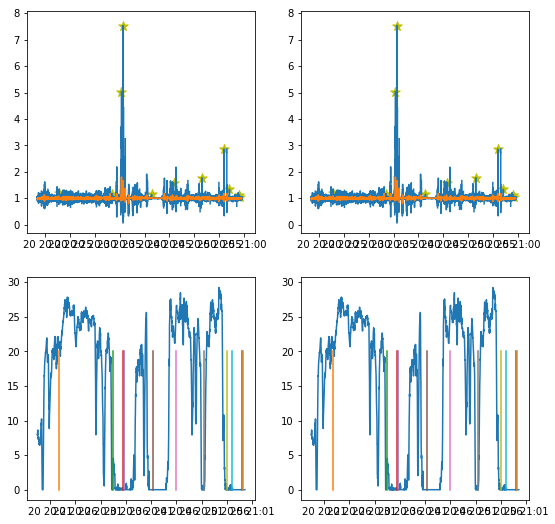

42 10


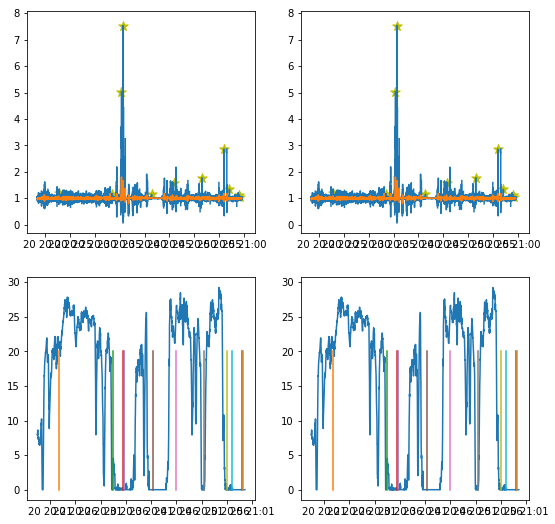

43 10


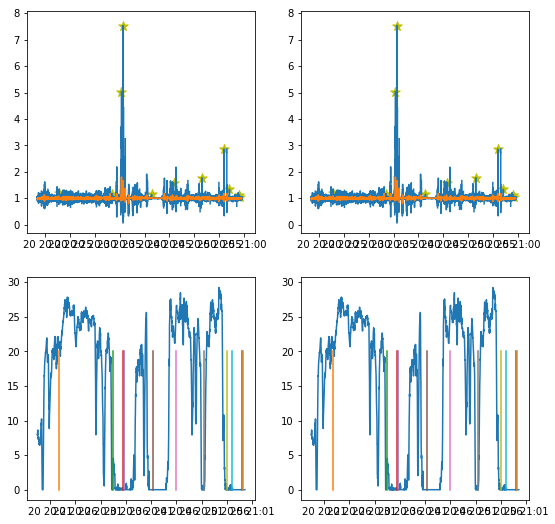

44 11


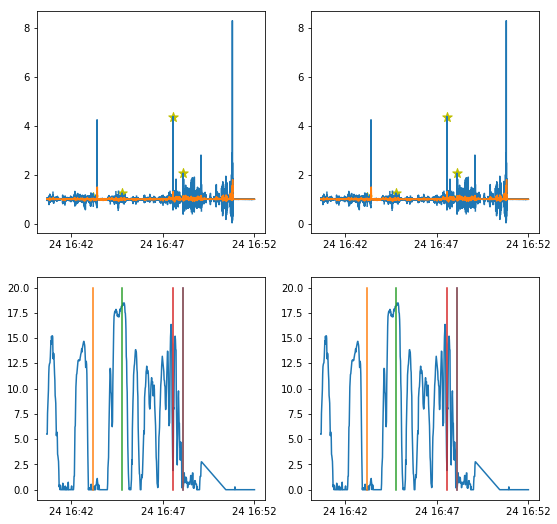

45 11


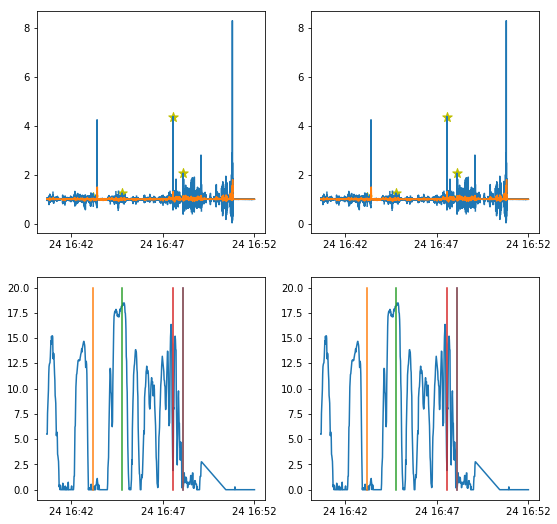

46 11


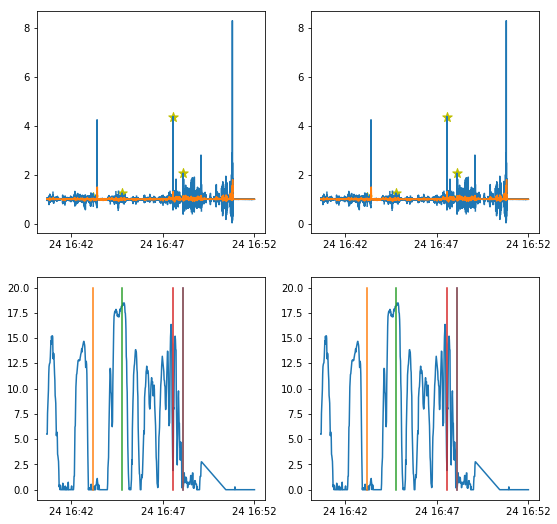

47 11


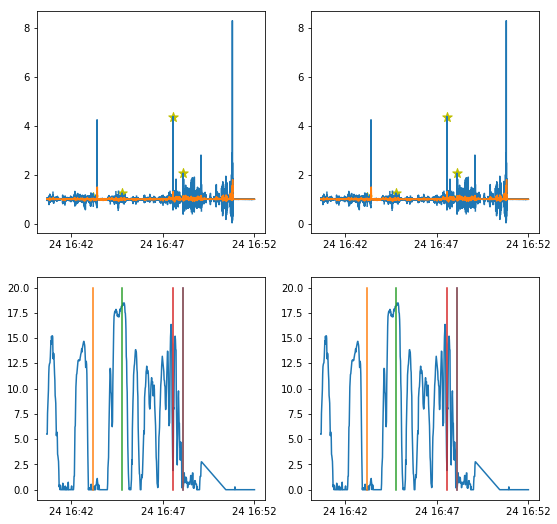

48 11


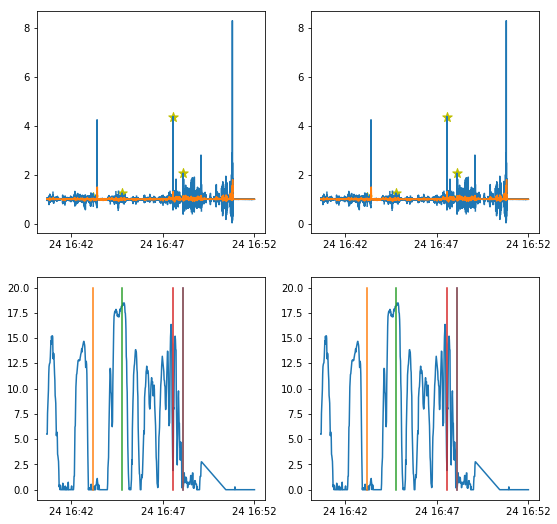

49 12


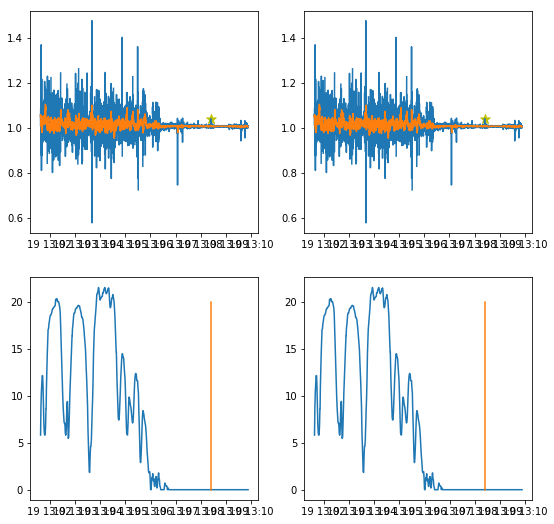

50 13


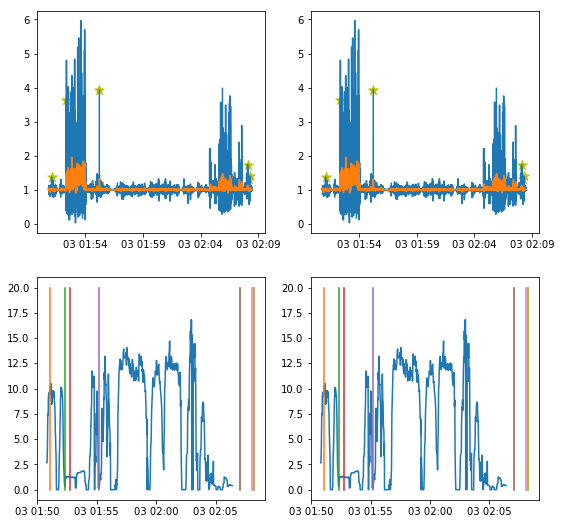

51 13


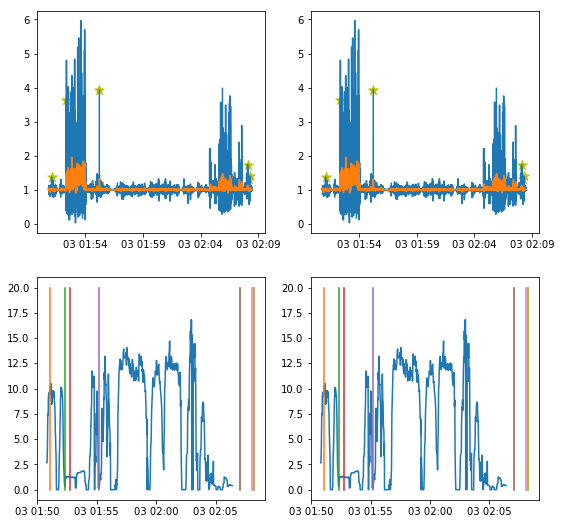

52 13


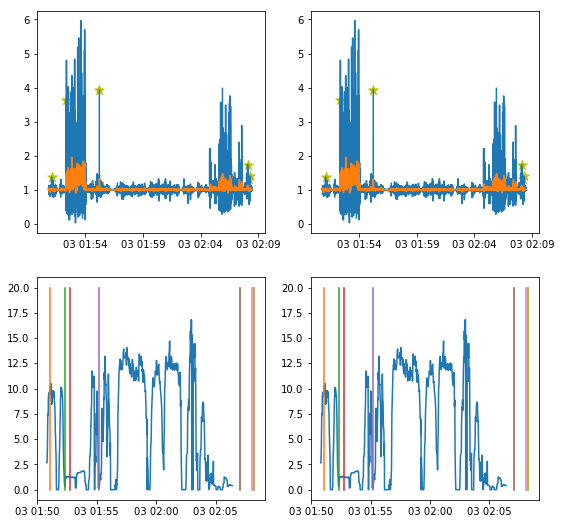

53 13


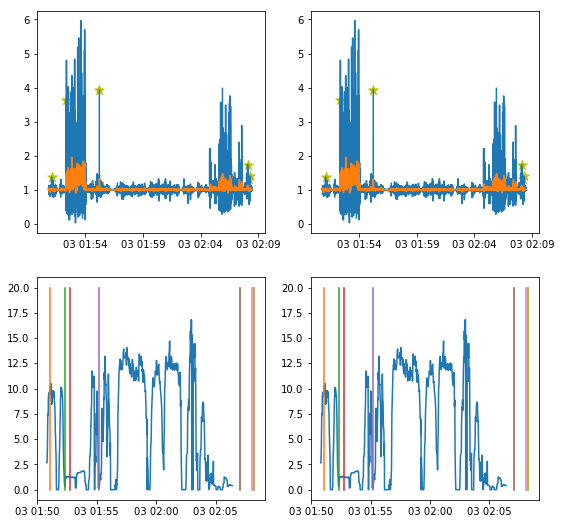

54 13


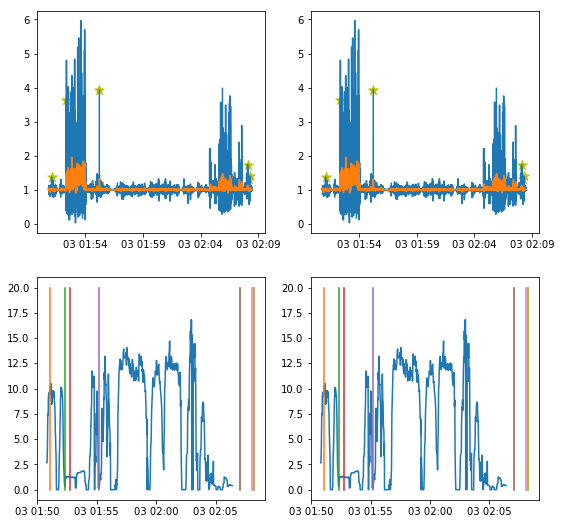

55 13


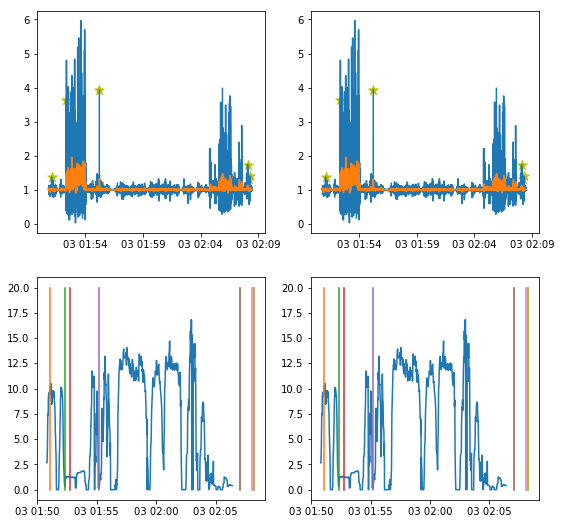

56 13


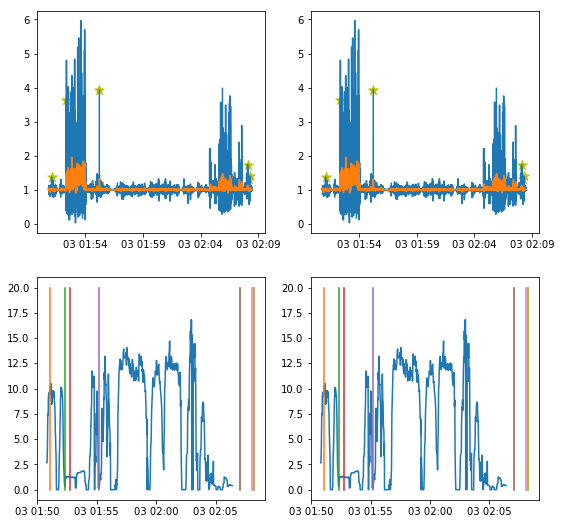

57 13


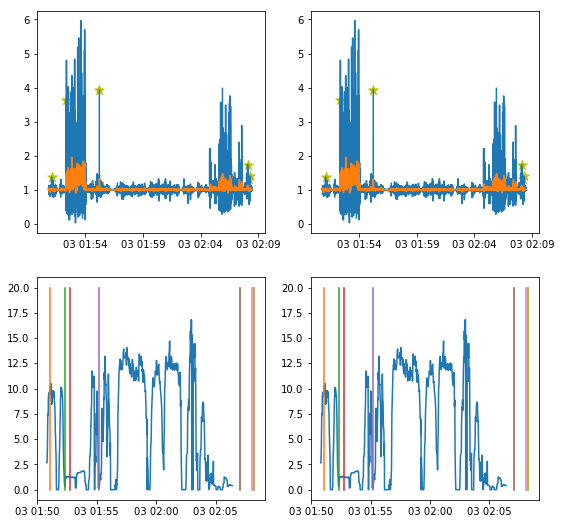

58 15


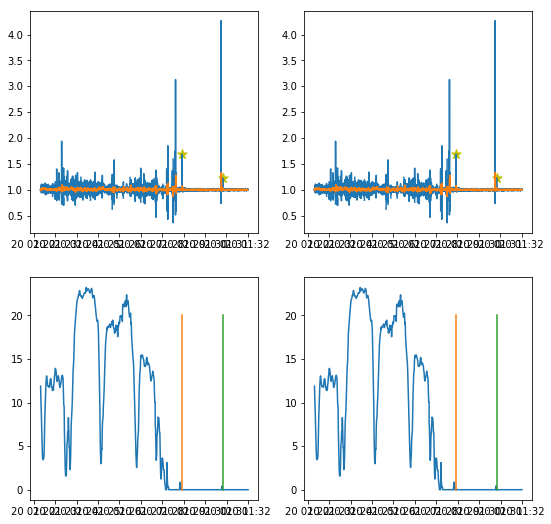

59 15


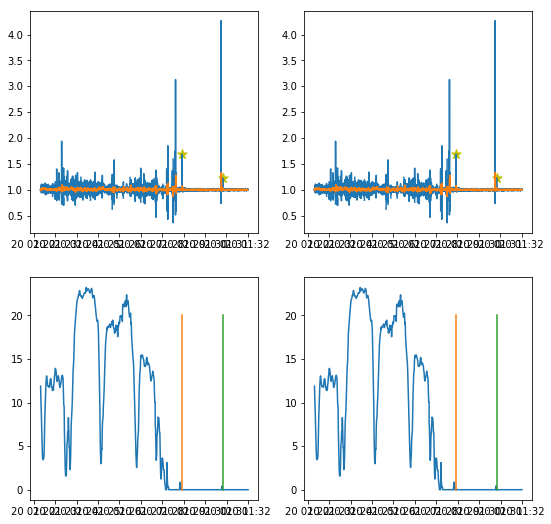

60 17


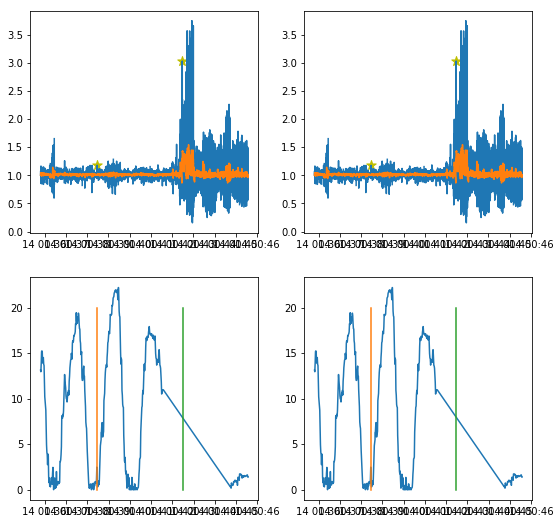

61 17


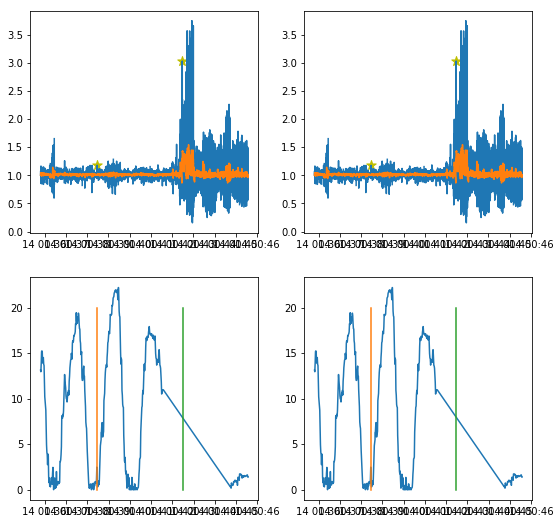

62 20


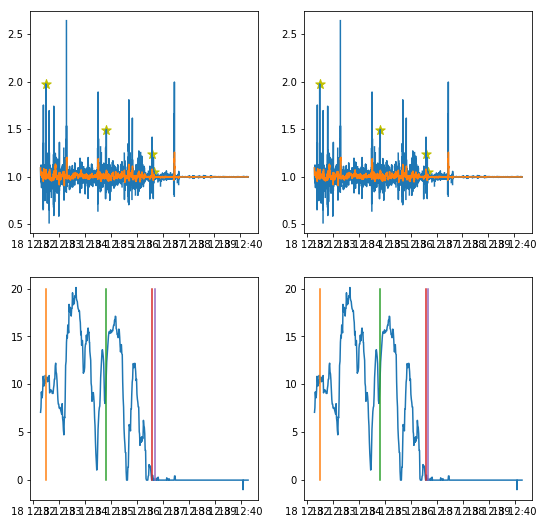

63 20


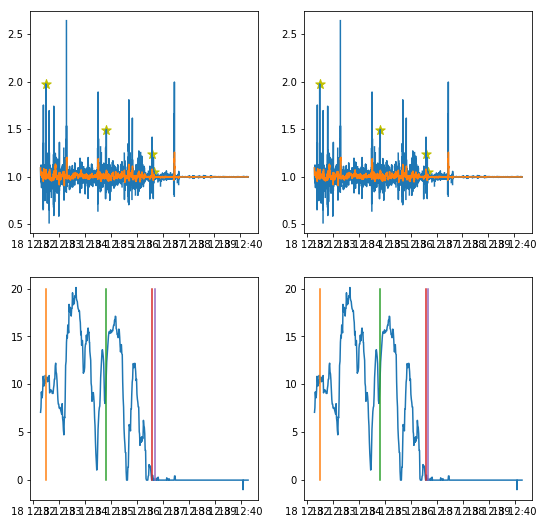

64 20


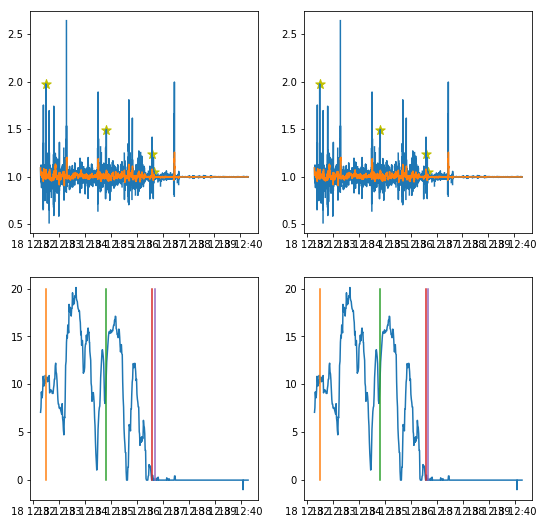

65 20


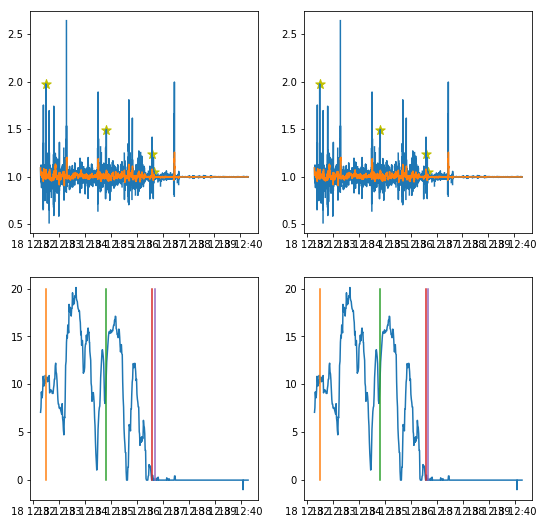

66 21


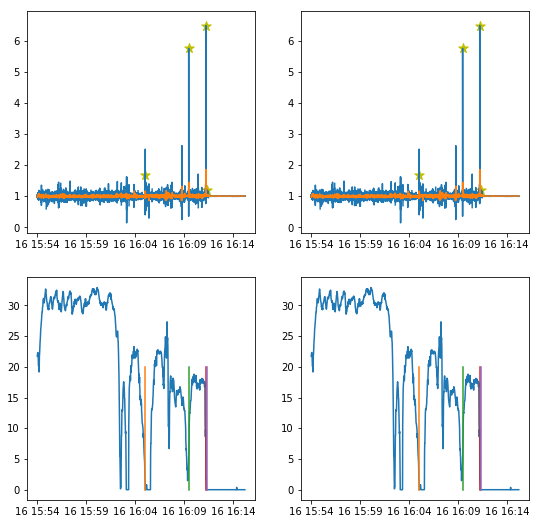

67 21


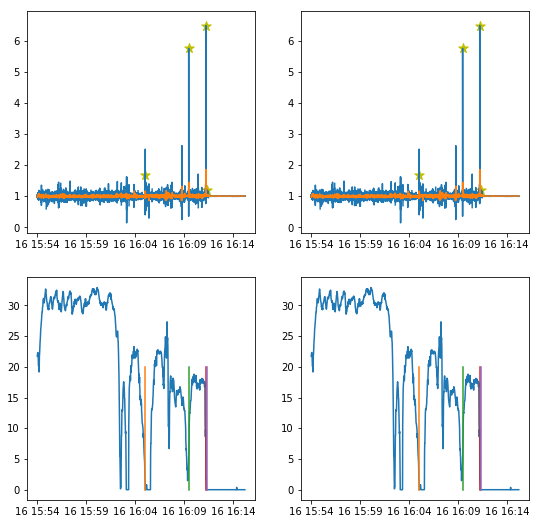

68 21


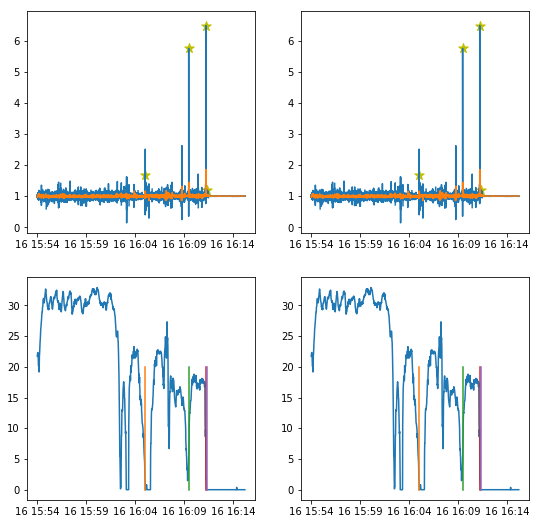

69 21


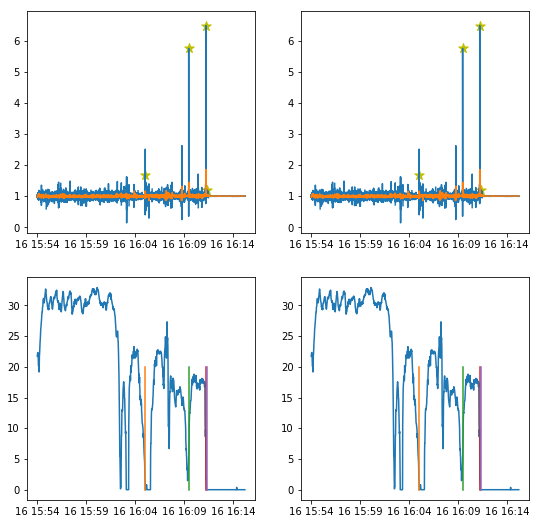

70 23


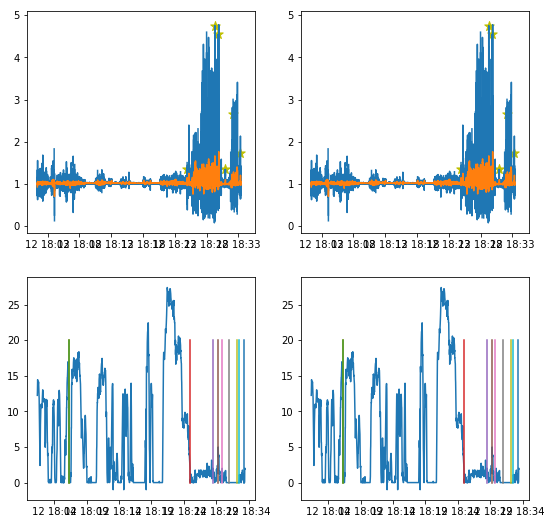

71 23


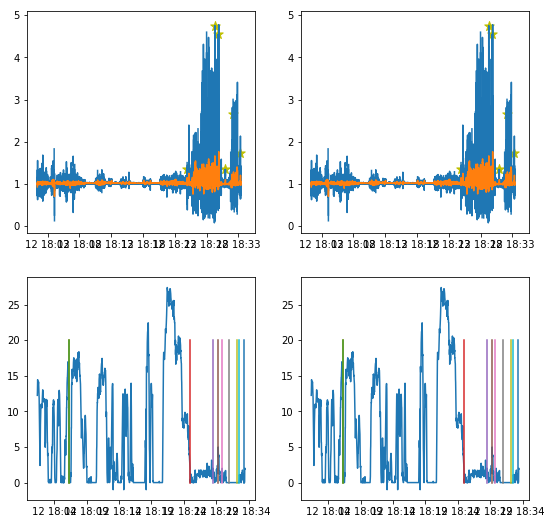

72 23


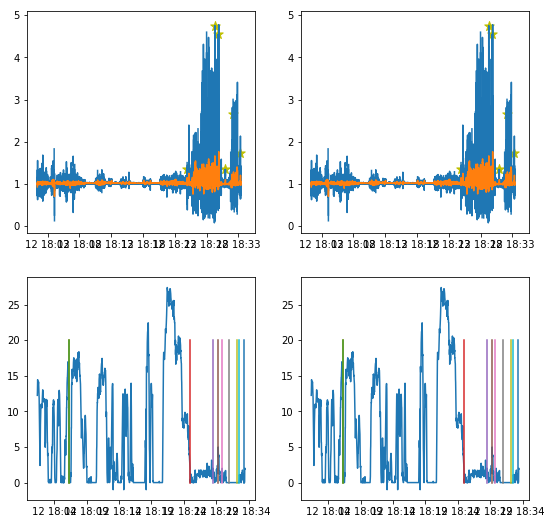

73 23


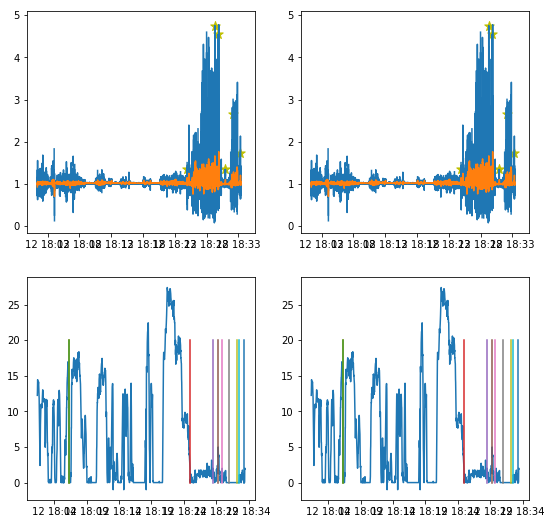

74 23


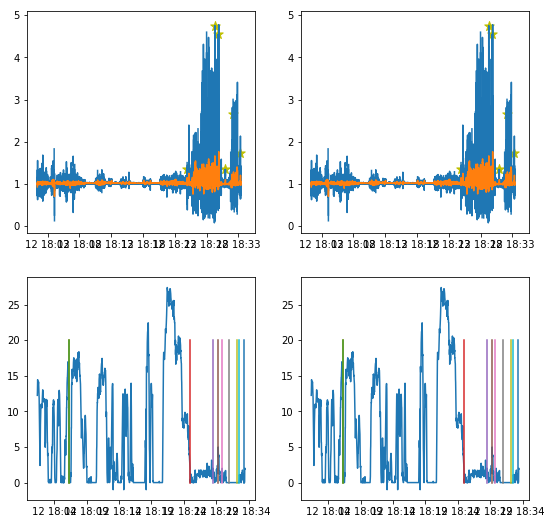

75 23


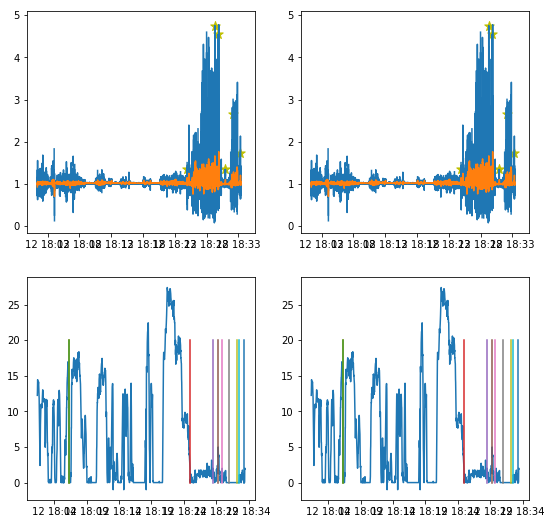

76 23


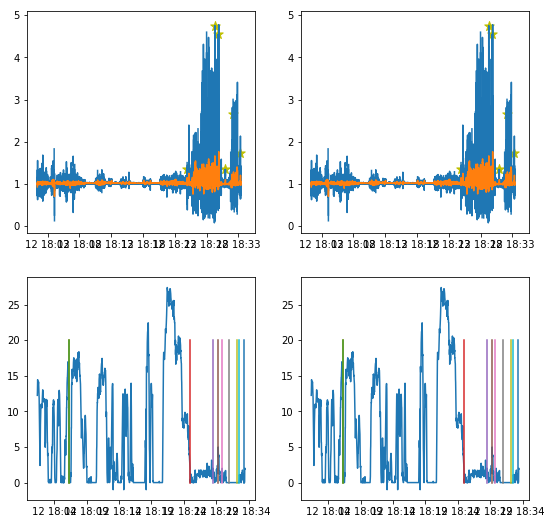

77 23


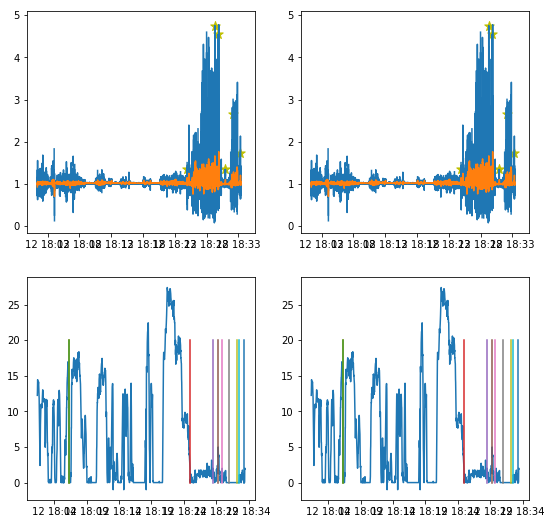

78 23


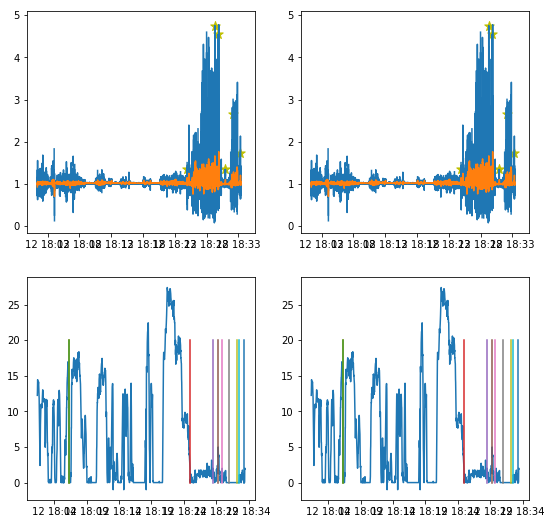

79 23


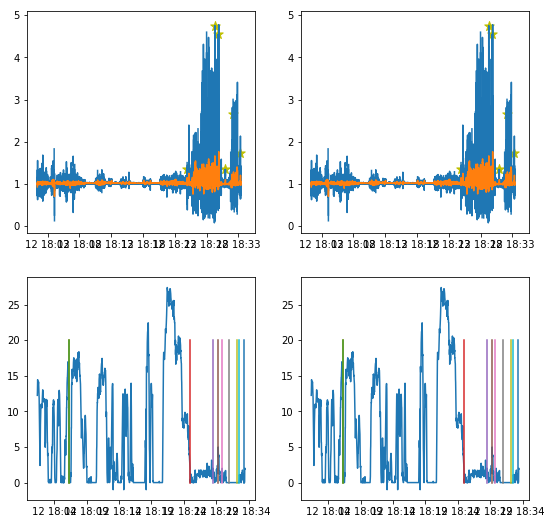

In [205]:
for i, driver in enumerate(event.driver):
    print(i,driver)
    
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
    
    test = dfs[driver].sort_values(by='time')
    test = test.set_index(['time'])

    test2 = test.rolling(window).mean()
    test2_std = test.rolling(window).std()
    
    
    
    ax1.plot(dfs[driver].time,dfs[driver].mag)
    ax1.plot(test2.index, test2.mag)
    this_event = event[event.driver==driver]
    ax1.scatter(this_event.index,this_event.mag, marker='*',s=100,c='y')

    
    ax2.plot(dfs[driver].time,dfs[driver].mag)
    ax2.plot(test2.index, test2.mag)
    ax2.scatter(this_event.index,this_event.mag, marker='*',s=100,c='y')
    #ax2.set_xlim([this_event.index - timedelta(seconds=30),this_event.index + timedelta(seconds=30)])
    
    
    
    test4 = dfs[driver][['time','speed']]
    test4 = test4.dropna(axis=0)
    ax3.plot(test4.time,test4.speed)
    ax3.plot([this_event.index,this_event.index],[0,20])
    
    ax4.plot(test4.time,test4.speed)
    ax4.plot([this_event.index,this_event.index],[0,20])
    #ax4.set_xlim([this_event.index - timedelta(seconds=30),this_event.index + timedelta(seconds=30)])  
  

    plt.show()

    

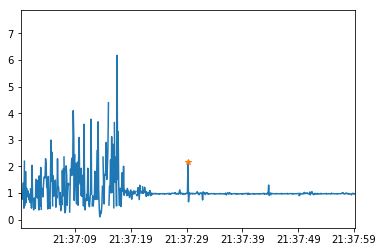

In [189]:

#test4 = dfs[6]
#test5 = test4[test4.time=='2015-03-19 21:37:29.228870']
#test4 = test4.dropna(axis=0,how='any')
plt.plot(dfs[6].time,dfs[6].mag)
this_event = event[event.driver==6]

plt.plot(this_event.index, this_event.mag, marker='*')

#print(this_event.index)
from datetime import datetime, timedelta
#print(this_event.index+ timedelta(seconds=30))
plt.xlim([this_event.index - timedelta(seconds=30),this_event.index + timedelta(seconds=30)])
plt.show()

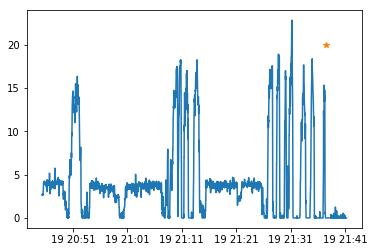

In [74]:
test4 = dfs[6][['time','speed']]
test4 = test4.dropna(axis=0)
plt.plot(test4.time,test4.speed)
plt.plot(test5.time, 20, marker='*')
plt.show()

In [43]:
def Observe_crash(events_df, dfs):
    

In [83]:
test2

NameError: name 'test2' is not defined

In [89]:
test = dfs[6].sort_values(by='time')
test = test.set_index(['time'])

In [97]:
test.iloc[0]

timestamp    1.4268e+12
type                gps
lat             39.1894
lon            -106.949
height          2980.75
accuracy              5
speed              2.67
bearing         195.469
x                   NaN
y                   NaN
z                   NaN
mag                 NaN
Name: 2015-03-19 20:45:21.058870, dtype: object

In [96]:
test.head()

timestamp           type        lat  \
time                                                                 
2015-03-19 20:45:21.058870  1.426798e+12            gps  39.189448   
2015-03-19 20:45:21.113870  1.426798e+12  accelerometer        NaN   
2015-03-19 20:45:21.209870  1.426798e+12  accelerometer        NaN   
2015-03-19 20:45:21.306870  1.426798e+12  accelerometer        NaN   
2015-03-19 20:45:21.403870  1.426798e+12  accelerometer        NaN   

                                   lon       height  accuracy  speed  \
time                                                                   
2015-03-19 20:45:21.058870 -106.948849  2980.754597       5.0   2.67   
2015-03-19 20:45:21.113870         NaN          NaN       NaN    NaN   
2015-03-19 20:45:21.209870         NaN          NaN       NaN    NaN   
2015-03-19 20:45:21.306870         NaN          NaN       NaN    NaN   
2015-03-19 20:45:21.403870         NaN          NaN       NaN    NaN   

                              bearing         x         y         z       mag  
time                                                                           
2015-03-19 20:45:21.058870  195.46875       NaN       NaN       NaN       NaN  
2015-03-19 20:45:21.113870        NaN -0.233551  0.144394  0.960358  0.998841  
2015-03-19 20:45:21.209870        NaN -0.256973  0.161850  0.940002  0.987844  
2015-03-19 20:45:21.306870        NaN -0.171021  0.205933  0.975983  1.012027  
2015-03-19 20:45:21.403870        NaN -0.079910  0.253296  0.974945  1.010476

In [156]:
variable = 'mag'
window = '1s'

events_df = pd.DataFrame()
drivers = []
for i in range(6,24):
    test = dfs[i].sort_values(by='time')
    test = test.set_index(['time'])

    test2 = test.rolling(window).mean()
    test2_std = test.rolling(window).std()

    orig_df = dfs[i][['time',variable]]
    orig_df = orig_df.sort_values(by='time')
    orig_df.set_index(['time'])
    orig_df_plot = orig_df.dropna(axis=0,how='any')


    for j in range(0,len(test.index)):
        if test[variable][j] > (test2[variable][j]+(3*test2_std[variable][j])):
            print(orig_df[variable][j],(test2[variable][j]+(3*test2_std[variable][j])))
            print(i,test2.index[j])
            events_df = events_df.append(test.iloc[j])
            drivers.append(i)
events_df['driver']=drivers





2.15125799144 2.14699211901
6 2015-03-19 21:37:29.228870
1.33596135447 1.33547249467
7 2015-04-13 21:21:31.568980
1.14483479563 1.14474229458
10 2015-06-20 20:41:24.693120
2.06536171627 2.06349340138
11 2015-06-24 16:48:06.734000
3.92911465043 3.91612985662
13 2015-04-03 01:55:12.872260
1.68243036071 1.68139550169
15 2015-04-20 01:28:56.284670
3.03599578822 2.63986352134
17 2015-05-14 00:42:28.877900
1.20071993507 1.2003339319
21 2015-03-16 16:11:23.176690
1.34078970763 1.34033619242
23 2015-05-12 18:30:56.806110


In [164]:
variable = 'mag'
window = '1s'

events_df2 = pd.DataFrame()
drivers = []
for i in range(6,24):
    test = dfs[i].sort_values(by='time')
    test = test.set_index(['time'])

    test2 = test.rolling(window).mean()
    test2_std = test.rolling(window).std()

    orig_df = dfs[i][['time',variable]]
    orig_df = orig_df.sort_values(by='time')
    orig_df = orig_df.set_index(['time'])


    for j in range(0,len(orig_df.index)):
        if orig_df[variable][j] > (test2[variable][j]+(3.0*test2_std[variable][j])):
            #print(orig_df[variable][j],(test2[variable][j]+(3*test2_std[variable][j])))
            print(i,test2.index[j])
            events_df2 = events_df2.append(orig_df.iloc[j])
            drivers.append(i)
events_df2['driver']=drivers






6 2015-03-19 21:37:29.228870
7 2015-04-13 21:21:31.568980
10 2015-06-20 20:41:24.693120
11 2015-06-24 16:48:06.734000
13 2015-04-03 01:55:12.872260
15 2015-04-20 01:28:56.284670
17 2015-05-14 00:42:28.877900
21 2015-03-16 16:11:23.176690
23 2015-05-12 18:30:56.806110


In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21644 entries, 2015-05-12 18:01:22.051110 to 2015-05-12 18:33:25.961110
Data columns (total 12 columns):
timestamp    21644 non-null float64
type         21644 non-null object
lat          1926 non-null float64
lon          1926 non-null float64
height       1926 non-null float64
accuracy     1926 non-null float64
speed        1926 non-null float64
bearing      1926 non-null float64
x            19718 non-null float64
y            19718 non-null float64
z            19718 non-null float64
mag          19718 non-null float64
dtypes: float64(11), object(1)
memory usage: 2.8+ MB


In [140]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21644 entries, 2015-05-12 18:01:22.051110 to 2015-05-12 18:33:25.961110
Data columns (total 12 columns):
timestamp    21644 non-null float64
type         21644 non-null object
lat          21390 non-null float64
lon          21390 non-null float64
height       21390 non-null float64
accuracy     21390 non-null float64
speed        21390 non-null float64
bearing      21390 non-null float64
x            21643 non-null float64
y            21643 non-null float64
z            21643 non-null float64
mag          21643 non-null float64
dtypes: float64(11), object(1)
memory usage: 2.8+ MB


In [141]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21644 entries, 0 to 21643
Data columns (total 2 columns):
time    21644 non-null datetime64[ns]
mag     19718 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 338.3 KB


In [142]:
test.head(3)

timestamp           type        lat       lon  \
time                                                                           
2015-05-12 18:01:22.051110  1.431454e+12            gps  26.130737 -80.10599   
2015-05-12 18:01:22.116110  1.431454e+12  accelerometer        NaN       NaN   
2015-05-12 18:01:22.214110  1.431454e+12  accelerometer        NaN       NaN   

                              height  accuracy  speed  bearing         x  \
time                                                                       
2015-05-12 18:01:22.051110  2.888485       5.0  12.26    180.0       NaN   
2015-05-12 18:01:22.116110       NaN       NaN    NaN      NaN -0.116333   
2015-05-12 18:01:22.214110       NaN       NaN    NaN      NaN -0.170715   

                                   y         z       mag  
time                                                      
2015-05-12 18:01:22.051110       NaN       NaN       NaN  
2015-05-12 18:01:22.116110 -0.650818 -0.650375  0.927408  
2015-05-12 18:01:22.214110 -0.775162 -0.741837  1.086435

In [143]:
test2.head(3)

timestamp           type        lat       lon  \
time                                                                           
2015-05-12 18:01:22.051110  1.431454e+12            gps  26.130737 -80.10599   
2015-05-12 18:01:22.116110  1.431454e+12  accelerometer  26.130737 -80.10599   
2015-05-12 18:01:22.214110  1.431454e+12  accelerometer  26.130737 -80.10599   

                              height  accuracy  speed  bearing         x  \
time                                                                       
2015-05-12 18:01:22.051110  2.888485       5.0  12.26    180.0       NaN   
2015-05-12 18:01:22.116110  2.888485       5.0  12.26    180.0 -0.116333   
2015-05-12 18:01:22.214110  2.888485       5.0  12.26    180.0 -0.143524   

                                   y         z       mag  
time                                                      
2015-05-12 18:01:22.051110       NaN       NaN       NaN  
2015-05-12 18:01:22.116110 -0.650818 -0.650375  0.927408  
2015-05-12 18:01:22.214110 -0.712990 -0.696106  1.006921

In [144]:
orig_df.head(3)

time       mag
0 2015-05-12 18:01:22.051110       NaN
1 2015-05-12 18:01:22.116110  0.927408
2 2015-05-12 18:01:22.214110  1.086435

In [149]:
events_df

accuracy  bearing  height  lat  lon       mag  \
2015-03-19 21:37:29.228870       NaN      NaN     NaN  NaN  NaN  2.151258   
2015-04-13 21:21:31.568980       NaN      NaN     NaN  NaN  NaN  1.335961   
2015-06-20 20:41:24.693120       NaN      NaN     NaN  NaN  NaN  1.144835   
2015-06-24 16:48:06.734000       NaN      NaN     NaN  NaN  NaN  2.065362   
2015-04-03 01:55:12.872260       NaN      NaN     NaN  NaN  NaN  3.929115   
2015-04-20 01:28:56.284670       NaN      NaN     NaN  NaN  NaN  1.682430   
2015-05-14 00:42:28.877900       NaN      NaN     NaN  NaN  NaN  3.035996   
2015-03-16 16:11:23.176690       NaN      NaN     NaN  NaN  NaN  1.200720   
2015-05-12 18:30:56.806110       NaN      NaN     NaN  NaN  NaN  1.340790   

                            speed     timestamp           type         x  \
2015-03-19 21:37:29.228870    NaN  1.426801e+12  accelerometer -0.489288   
2015-04-13 21:21:31.568980    NaN  1.428960e+12  accelerometer  0.234680   
2015-06-20 20:41:24.693120    NaN  1.434833e+12  accelerometer -0.062454   
2015-06-24 16:48:06.734000    NaN  1.435164e+12  accelerometer -0.886932   
2015-04-03 01:55:12.872260    NaN  1.428026e+12  accelerometer  3.691986   
2015-04-20 01:28:56.284670    NaN  1.429493e+12  accelerometer  0.135437   
2015-05-14 00:42:28.877900    NaN  1.431564e+12  accelerometer -0.755341   
2015-03-16 16:11:23.176690    NaN  1.426522e+12  accelerometer -0.064621   
2015-05-12 18:30:56.806110    NaN  1.431455e+12  accelerometer  0.435593   

                                   y         z  driver  
2015-03-19 21:37:29.228870  2.077698  0.267731       6  
2015-04-13 21:21:31.568980 -0.244629 -1.292236       7  
2015-06-20 20:41:24.693120  0.053848 -1.141861      10  
2015-06-24 16:48:06.734000 -1.420258 -1.209106      11  
2015-04-03 01:55:12.872260  0.531845 -1.234634      13  
2015-04-20 01:28:56.284670  0.460983  1.612366      15  
2015-05-14 00:42:28.877900 -2.882690  0.580368      17  
2015-03-16 16:11:23.176690  0.132370 -1.191650      21  
2015-05-12 18:30:56.806110 -1.199905  0.410126      23

In [150]:
events_df2

mag                       time  driver
35359  2.151258 2015-03-19 21:37:29.228870       6
7616   1.335961 2015-04-13 21:21:31.568980       7
229    1.112070 2015-03-16 21:54:00.997370       9
15291  1.144835 2015-06-20 20:41:24.693120      10
17362  1.669809 2015-06-20 20:44:31.532120      10
4991   2.065362 2015-06-24 16:48:06.734000      11
3035   3.929115 2015-04-03 01:55:12.872260      13
4380   1.682430 2015-04-20 01:28:56.284670      15
4450   3.035996 2015-05-14 00:42:28.877900      17
676    1.527785 2015-04-19 22:22:17.788430      19
2245   1.098216 2015-06-18 12:35:37.967130      20
7500   2.505750 2015-03-16 16:05:02.687690      21
11816  1.200720 2015-03-16 16:11:23.176690      21
6401   1.317077 2015-05-12 18:10:51.014110      23
19964  1.340790 2015-05-12 18:30:56.806110      23

In [159]:
test.iloc[50]

timestamp      1.43145e+12
type         accelerometer
lat                    NaN
lon                    NaN
height                 NaN
accuracy               NaN
speed                  NaN
bearing                NaN
x                -0.128052
y                -0.546326
z                -0.810516
mag               0.985802
Name: 2015-05-12 18:01:26.517110, dtype: object

In [160]:
orig_df.iloc[50]

time    2015-05-12 18:01:26.517110
mag                       0.985802
Name: 50, dtype: object

In [180]:
event

accuracy  bearing  height  lat  lon       mag  \
2015-03-19 21:37:29.228870       NaN      NaN     NaN  NaN  NaN  2.151258   
2015-04-13 21:21:31.568980       NaN      NaN     NaN  NaN  NaN  1.335961   
2015-06-20 20:41:24.693120       NaN      NaN     NaN  NaN  NaN  1.144835   
2015-06-24 16:48:06.734000       NaN      NaN     NaN  NaN  NaN  2.065362   
2015-04-03 01:55:12.872260       NaN      NaN     NaN  NaN  NaN  3.929115   
2015-04-20 01:28:56.284670       NaN      NaN     NaN  NaN  NaN  1.682430   
2015-05-14 00:42:28.877900       NaN      NaN     NaN  NaN  NaN  3.035996   
2015-03-16 16:11:23.176690       NaN      NaN     NaN  NaN  NaN  1.200720   
2015-05-12 18:30:56.806110       NaN      NaN     NaN  NaN  NaN  1.340790   

                            speed     timestamp           type         x  \
2015-03-19 21:37:29.228870    NaN  1.426801e+12  accelerometer -0.489288   
2015-04-13 21:21:31.568980    NaN  1.428960e+12  accelerometer  0.234680   
2015-06-20 20:41:24.693120    NaN  1.434833e+12  accelerometer -0.062454   
2015-06-24 16:48:06.734000    NaN  1.435164e+12  accelerometer -0.886932   
2015-04-03 01:55:12.872260    NaN  1.428026e+12  accelerometer  3.691986   
2015-04-20 01:28:56.284670    NaN  1.429493e+12  accelerometer  0.135437   
2015-05-14 00:42:28.877900    NaN  1.431564e+12  accelerometer -0.755341   
2015-03-16 16:11:23.176690    NaN  1.426522e+12  accelerometer -0.064621   
2015-05-12 18:30:56.806110    NaN  1.431455e+12  accelerometer  0.435593   

                                   y         z  driver  
2015-03-19 21:37:29.228870  2.077698  0.267731       6  
2015-04-13 21:21:31.568980 -0.244629 -1.292236       7  
2015-06-20 20:41:24.693120  0.053848 -1.141861      10  
2015-06-24 16:48:06.734000 -1.420258 -1.209106      11  
2015-04-03 01:55:12.872260  0.531845 -1.234634      13  
2015-04-20 01:28:56.284670  0.460983  1.612366      15  
2015-05-14 00:42:28.877900 -2.882690  0.580368      17  
2015-03-16 16:11:23.176690  0.132370 -1.191650      21  
2015-05-12 18:30:56.806110 -1.199905  0.410126      23